In [9]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np

In [10]:
master_cat = Table.read('COSMOSWeb_mastercatalog_v1_photom_primary.fits')
master_cat

id,segment-id,tile,id_specz_khostovan25,ra,dec,x_image,y_image,a_image,b_image,theta_image,theta_world,chi2_max,mode,snr_hst-f814w,wht_hst-f814w,flux_auto_hst-f814w,flux_err_auto_hst-f814w,mag_auto_hst-f814w,flux_aper_hst-f814w,flux_err_aper_hst-f814w,mag_aper_hst-f814w,snr_f115w,wht_f115w,flux_auto_f115w,flux_err_auto_f115w,mag_auto_f115w,flux_aper_f115w,flux_err_aper_f115w,mag_aper_f115w,snr_f150w,wht_f150w,flux_auto_f150w,flux_err_auto_f150w,mag_auto_f150w,flux_aper_f150w,flux_err_aper_f150w,mag_aper_f150w,snr_f277w,wht_f277w,flux_auto_f277w,flux_err_auto_f277w,mag_auto_f277w,flux_aper_f277w,flux_err_aper_f277w,mag_aper_f277w,snr_f444w,wht_f444w,flux_auto_f444w,flux_err_auto_f444w,mag_auto_f444w,flux_aper_f444w,flux_err_aper_f444w,mag_aper_f444w,snr_f770w,wht_f770w,flux_auto_f770w,flux_err_auto_f770w,mag_auto_f770w,flux_aper_f770w,flux_err_aper_f770w,mag_aper_f770w,c_f444w,fwhm,mu_max_hst-f814w,mu_max_f115w,mu_max_f150w,mu_max_f277w,mu_max_f444w,mu_max_f770w,kron_rad,kron1_a,kron1_b,kron1_area,kron2_a,kron2_b,kron2_area,seg_area,kron_corr,kron_f444w_psf_corr,kron_f770w_psf_corr,kron_f770w_ap_corr,flag_star,flag_blend,ra_model,dec_model,radius_sersic,radius_sersic_err,axratio_sersic,axratio_sersic_err,sersic,sersic_err,angle_sersic,angle_sersic_err,e1,e1_err,e2,e2_err,fmf_chi2,group_id,mag_model_f115w,mag_model_f150w,mag_model_f277w,mag_model_f444w,mag_model_hst-f814w,mag_model_f770w,mag_model_cfht-u,mag_model_hsc-g,mag_model_hsc-r,mag_model_hsc-i,mag_model_hsc-z,mag_model_hsc-y,mag_model_hsc-nb0816,mag_model_hsc-nb0921,mag_model_hsc-nb1010,mag_model_uvista-y,mag_model_uvista-j,mag_model_uvista-h,mag_model_uvista-ks,mag_model_uvista-nb118,mag_model_sc-ia484,mag_model_sc-ia527,mag_model_sc-ia624,mag_model_sc-ia679,mag_model_sc-ia738,mag_model_sc-ia767,mag_model_sc-ib427,mag_model_sc-ib505,mag_model_sc-ib574,mag_model_sc-ib709,mag_model_sc-ib827,mag_model_sc-nb711,mag_model_sc-nb816,mag_model_irac-ch1,mag_model_irac-ch2,mag_model_irac-ch3,mag_model_irac-ch4,mag_err_model_f115w,mag_err_model_f150w,mag_err_model_f277w,mag_err_model_f444w,mag_err_model_hst-f814w,mag_err_model_f770w,mag_err_model_cfht-u,mag_err_model_hsc-g,mag_err_model_hsc-r,mag_err_model_hsc-i,mag_err_model_hsc-z,mag_err_model_hsc-y,mag_err_model_hsc-nb0816,mag_err_model_hsc-nb0921,mag_err_model_hsc-nb1010,mag_err_model_uvista-y,mag_err_model_uvista-j,mag_err_model_uvista-h,mag_err_model_uvista-ks,mag_err_model_uvista-nb118,mag_err_model_sc-ia484,mag_err_model_sc-ia527,mag_err_model_sc-ia624,mag_err_model_sc-ia679,mag_err_model_sc-ia738,mag_err_model_sc-ia767,mag_err_model_sc-ib427,mag_err_model_sc-ib505,mag_err_model_sc-ib574,mag_err_model_sc-ib709,mag_err_model_sc-ib827,mag_err_model_sc-nb711,mag_err_model_sc-nb816,mag_err_model_irac-ch1,mag_err_model_irac-ch2,mag_err_model_irac-ch3,mag_err_model_irac-ch4,flux_model_f115w,flux_model_f150w,flux_model_f277w,flux_model_f444w,flux_model_hst-f814w,flux_model_f770w,flux_model_cfht-u,flux_model_hsc-g,flux_model_hsc-r,flux_model_hsc-i,flux_model_hsc-z,flux_model_hsc-y,flux_model_hsc-nb0816,flux_model_hsc-nb0921,flux_model_hsc-nb1010,flux_model_uvista-y,flux_model_uvista-j,flux_model_uvista-h,flux_model_uvista-ks,flux_model_uvista-nb118,flux_model_sc-ia484,flux_model_sc-ia527,flux_model_sc-ia624,flux_model_sc-ia679,flux_model_sc-ia738,flux_model_sc-ia767,flux_model_sc-ib427,flux_model_sc-ib505,flux_model_sc-ib574,flux_model_sc-ib709,flux_model_sc-ib827,flux_model_sc-nb711,flux_model_sc-nb816,flux_model_irac-ch1,flux_model_irac-ch2,flux_model_irac-ch3,flux_model_irac-ch4,flux_err-uncal_model_f115w,flux_err-uncal_model_f150w,flux_err-uncal_model_f277w,flux_err-uncal_model_f444w,flux_err-uncal_model_hst-f814w,flux_err-uncal_model_f770w,flux_err-uncal_model_cfht-u,flux_err-uncal_model_hsc-g,flux_err-uncal_model_hsc-r,flux_err-uncal_model_hsc-i,flux_err-uncal_model_hsc-z,flux_err-uncal_model_hsc-y,flux_err-uncal_model_hsc-nb0816,flux_err-uncal_model_hsc-nb0921,flux_err-uncal_model_hsc-nb1010,flux_err-uncal_model_uvista-y,fl

In [11]:
for column_names in master_cat.columns:
    print(column_names)

id
segment-id
tile
id_specz_khostovan25
ra
dec
x_image
y_image
a_image
b_image
theta_image
theta_world
chi2_max
mode
snr_hst-f814w
wht_hst-f814w
flux_auto_hst-f814w
flux_err_auto_hst-f814w
mag_auto_hst-f814w
flux_aper_hst-f814w
flux_err_aper_hst-f814w
mag_aper_hst-f814w
snr_f115w
wht_f115w
flux_auto_f115w
flux_err_auto_f115w
mag_auto_f115w
flux_aper_f115w
flux_err_aper_f115w
mag_aper_f115w
snr_f150w
wht_f150w
flux_auto_f150w
flux_err_auto_f150w
mag_auto_f150w
flux_aper_f150w
flux_err_aper_f150w
mag_aper_f150w
snr_f277w
wht_f277w
flux_auto_f277w
flux_err_auto_f277w
mag_auto_f277w
flux_aper_f277w
flux_err_aper_f277w
mag_aper_f277w
snr_f444w
wht_f444w
flux_auto_f444w
flux_err_auto_f444w
mag_auto_f444w
flux_aper_f444w
flux_err_aper_f444w
mag_aper_f444w
snr_f770w
wht_f770w
flux_auto_f770w
flux_err_auto_f770w
mag_auto_f770w
flux_aper_f770w
flux_err_aper_f770w
mag_aper_f770w
c_f444w
fwhm
mu_max_hst-f814w
mu_max_f115w
mu_max_f150w
mu_max_f277w
mu_max_f444w
mu_max_f770w
kron_rad
kron1_a
kron1_b

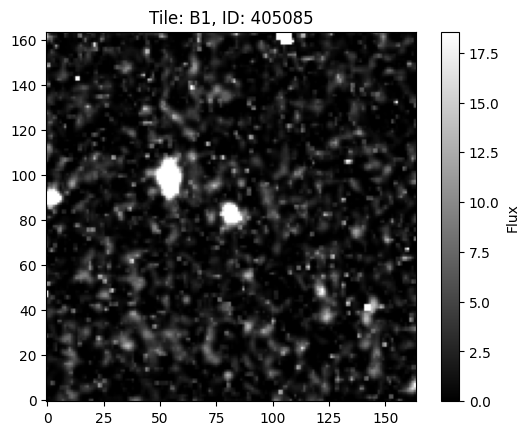

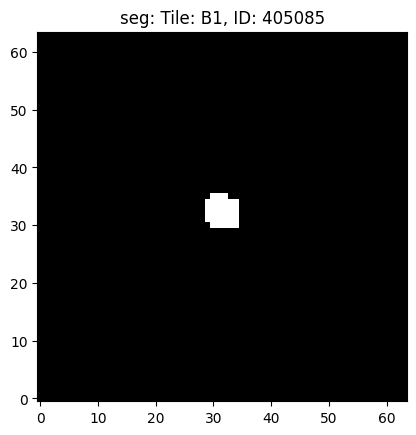

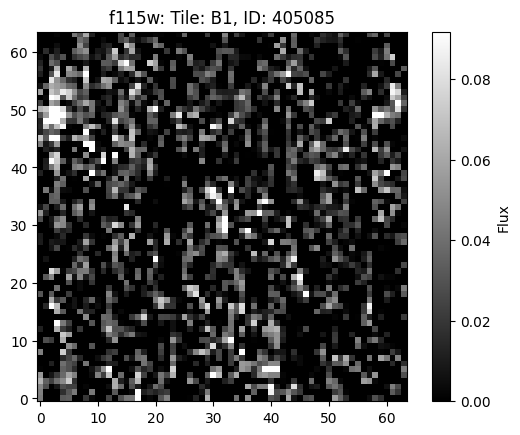

4.408327759254207


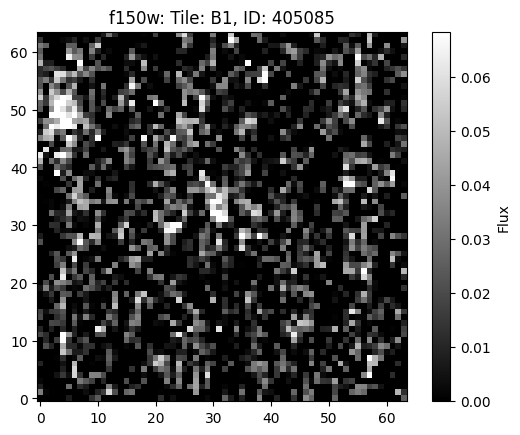

6.639501489256092


In [12]:
tiles = np.unique(master_cat['tile'])

def get_image_cutout(image, x_center, y_center, size=50):
    x_center = int(round(x_center))
    y_center = int(round(y_center))
    half_size = size // 2
    return image[y_center - half_size:y_center + half_size,
                      x_center - half_size:x_center + half_size]

for tile in tiles[10:11]:
    mask = (master_cat['tile'] == tile) & (master_cat['flag_blend']==False)
    tile_cat = master_cat[master_cat['tile'] == tile]
    obj_id = np.random.choice(tile_cat['id'])
    obj = tile_cat[tile_cat['id'] == obj_id][0]
    with fits.open(f'detection_images/detection_chi2pos_SWLW_{tile}.fits') as image_lis:
        with fits.open(f'segmentation_maps/detection_chi2pos_SWLW_{tile}_segmap_v1.3.fits.gz') as seg_lis:
            image = image_lis[0]
            seg   = seg_lis[0]

            x_center = obj['x_image']
            y_center = obj['y_image']
            image_cut = get_image_cutout(image.data, x_center, y_center, size=164)
            seg_cut = get_image_cutout(np.where(seg.data==obj['segment-id'],1,0), x_center, y_center, size=64)
            plt.imshow(image_cut, origin='lower', cmap='gray', vmin=0, vmax=np.percentile(image_cut, 99))
            plt.title(f"Tile: {tile}, ID: {obj['id']}")
            plt.colorbar(label='Flux')
            plt.show()
            plt.imshow(seg_cut, origin='lower', cmap='gray',vmin=0,vmax=1)
            plt.title(f"seg: Tile: {tile}, ID: {obj['id']}")
            plt.show()
            print()
    #now check with f115w and f150w
    for filter in ['f115w', 'f150w']:
        with fits.open(f'{filter}/mosaic_nircam_{filter}_COSMOS-Web_30mas_{tile}_v1.0_sci.fits') as sci_lis:
            image = sci_lis[0]
            image_cut = get_image_cutout(image.data, x_center, y_center, size=64)
            plt.imshow(image_cut, origin='lower', cmap='gray', vmin=0, vmax=np.percentile(image_cut, 99))
            plt.title(f"{filter}: Tile: {tile}, ID: {obj['id']}")
            plt.colorbar(label='Flux')
            plt.show()
            print(obj[f'snr_{filter}'])
            
            

In [13]:
with fits.open('f150w/mosaic_nircam_f150w_COSMOS-Web_30mas_A10_v1.0_sci.fits') as hdul:
    print(hdul[0].data.shape)
with fits.open('detection_images/detection_chi2pos_SWLW_A10.fits') as hdul:
    print(hdul[0].data.shape)

(24910, 19200)
(24910, 19200)


(array([  4094.,   8660.,  13975.,  20075.,  26572.,  33704.,  41487.,
         49854.,  58907.,  68729.,  79078.,  90101., 101428., 113188.,
        125762., 138773., 152042., 165681., 179792., 193695., 207688.,
        221794., 235719., 249373., 262899., 276092., 288971., 301393.,
        313650., 325314., 336591., 347373., 357969., 368199., 377755.,
        387148., 396142., 404760., 413076., 421004., 428608., 435754.,
        442800., 449416., 455740., 461600., 467263., 472842., 478156.,
        483156.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 50 artists>)

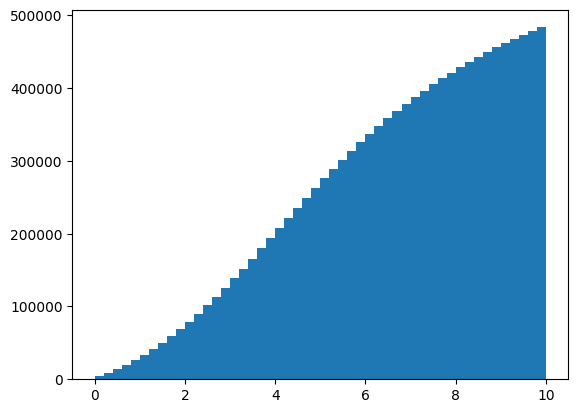

In [14]:
plt.hist(master_cat['snr_f115w'],cumulative=True, range = (0,10),bins=50)

In [96]:
mask = (master_cat['flag_blend'] != True) & (master_cat['warn_flag']<=2)

len(master_cat[mask])

726860

In [5]:
import h5py
data = h5py.File('../jwst/f115w/f115w_A1.h5')
data.keys()

<KeysViewHDF5 ['a_image', 'b_image', 'dec', 'flux_aper_f115w', 'flux_auto_f115w', 'flux_err_aper_f115w', 'flux_err_auto_f115w', 'id', 'image', 'ra', 'seg', 'sersic', 'sersic_err', 'snr_f115w', 'theta_image', 'tile']>

<KeysViewHDF5 ['a_image', 'b_image', 'dec', 'flux_aper_f115w', 'flux_auto_f115w', 'flux_err_aper_f115w', 'flux_err_auto_f115w', 'id', 'image', 'ra', 'seg', 'sersic', 'sersic_err', 'snr_f115w', 'theta_image', 'tile']>
9.394842568057733
(64, 64)


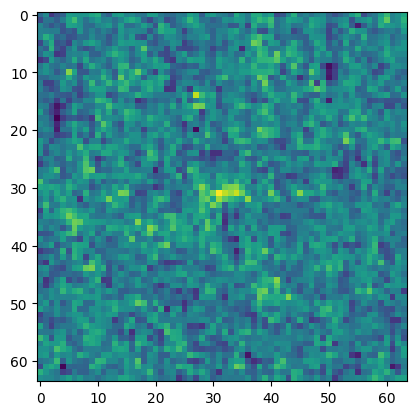

In [62]:
print(data.keys())
index = 8550
print(data['snr_f115w'][index])
plt.imshow(data['image'][index])
print(data['image'][index].shape)

/tmp/ipykernel_11586/4184543286.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.array(-2.5*np.log10(data['flux_auto_f115w'])),np.array(data['snr_f115w']),alpha=0.3,s=0.4)


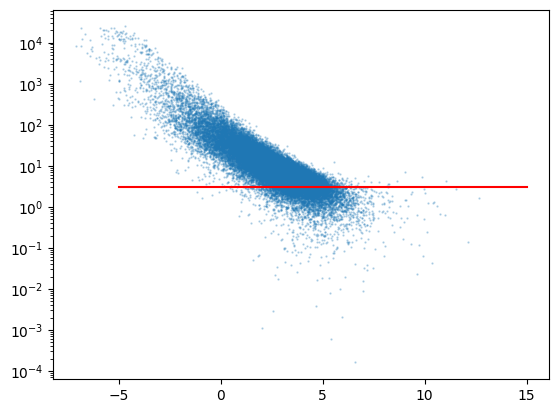

In [58]:
plt.scatter(np.array(-2.5*np.log10(data['flux_auto_f115w'])),np.array(data['snr_f115w']),alpha=0.3,s=0.4)
plt.plot((-5,15),(3,3),c='red')
plt.yscale('log')

In [73]:
images = np.array(data['image'])

In [1]:
snr = np.array(data['snr_f115w'])
len(snr[snr>2])*20

NameError: name 'np' is not defined

In [67]:
flux = np.array(data['flux_auto_f115w'])
len(flux[flux<=0])*20

19340

In [20]:
master_cat['kron1_a'].max()

36.34591048722097

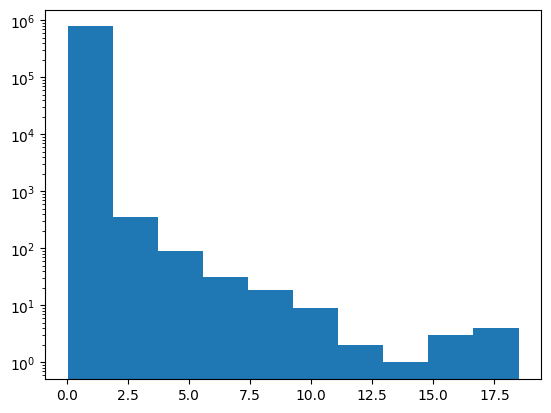

In [24]:
plt.hist(master_cat['kron1_b'])
plt.yscale('log')

In [2]:
from astroclip.astrodino.data.loaders import make_dataset
from astroclip.astrodino.data.augmentations import ToRGB
from torchvision import transforms


/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/lightning/fabric/__init__.py:41: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [5]:
crop_size=64
transform = transforms.Compose(
    [
        transforms.CenterCrop(crop_size),
        ToRGB(),
    ]
)
dataset_str = "jwst:split=train:root=/ptmp/yacheng/outthere_ssl/images/jwst:filter=f115w"
jwst = make_dataset(
dataset_str = dataset_str,
transform = transform,
channel = 2
)


{'split': 'train', 'root': '/ptmp/yacheng/outthere_ssl/images/jwst', 'filter': 'f115w'}


(array([[[1.83452308e-01, 1.68227702e-01, 1.74656108e-01, ...,
         1.12716444e-01, 2.45058417e-01, 2.80186892e-01],
        [1.20147340e-01, 4.47213597e-06, 1.21672049e-01, ...,
         1.86651349e-01, 1.21044971e-01, 1.34289011e-01],
        [1.72481969e-01, 4.47213597e-06, 1.00830995e-01, ...,
         2.40290210e-01, 1.87059417e-01, 1.21904612e-01],
        ...,
        [1.39748916e-01, 1.87883034e-01, 1.77228346e-01, ...,
         6.85965121e-02, 1.06667712e-01, 1.00297749e-01],
        [2.02555045e-01, 1.66039541e-01, 1.47348389e-01, ...,
         1.46835655e-01, 1.69641033e-01, 4.47213597e-06],
        [1.60862207e-01, 1.93428859e-01, 1.63172245e-01, ...,
         4.47213597e-06, 1.34855226e-01, 6.87745810e-02]],

       [[1.83452308e-01, 1.68227702e-01, 1.74656108e-01, ...,
         1.12716444e-01, 2.45058417e-01, 2.80186892e-01],
        [1.20147340e-01, 4.47213597e-06, 1.21672049e-01, ...,
         1.86651349e-01, 1.21044971e-01, 1.34289011e-01],
        [1.72481969e-01,

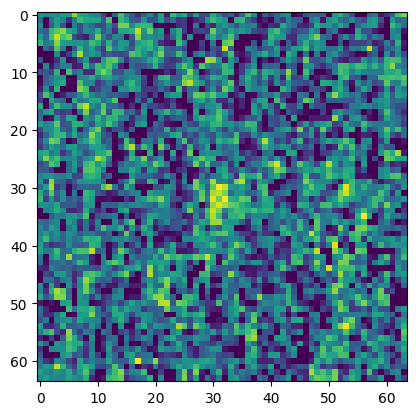

In [7]:
from matplotlib import pyplot as plt
data = jwst[5]
plt.imshow(data[0][0])
print(data)

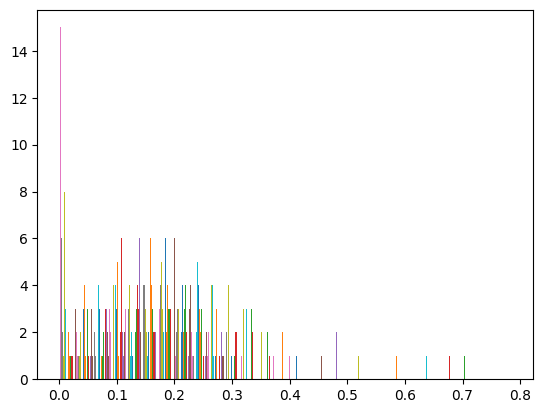

In [35]:
plt.hist(jwst[2][0][0],bins=60)
plt.show()

In [32]:
jwst[0

SyntaxError: incomplete input (2811922477.py, line 1)